<a href="https://colab.research.google.com/github/JBattana/115-Assignments-OnCampus-/blob/main/Week9_Assignment_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset into a pandas dataframe and answer the following questions:

Describe the structure of the diabetes dataset (size,features, data types)

In [1]:
# Code for loading and describing the structure
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes(as_frame=True)
df = diabetes.frame
print(df.shape)  # Output: (442, 11)
print(df.columns.tolist())  # Output: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
print(df.dtypes)  # All float64

(442, 11)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


Show the relationships between the target variable and the features using scatter plot and correlation analysis.

Correlation of Features with Target (s6, blood sugar level):
s6        1.000000
s5        0.464669
s4        0.417212
bp        0.390430
bmi       0.388680
target    0.382483
s1        0.325717
age       0.301731
s2        0.290600
sex       0.208133
s3       -0.273697
Name: s6, dtype: float64


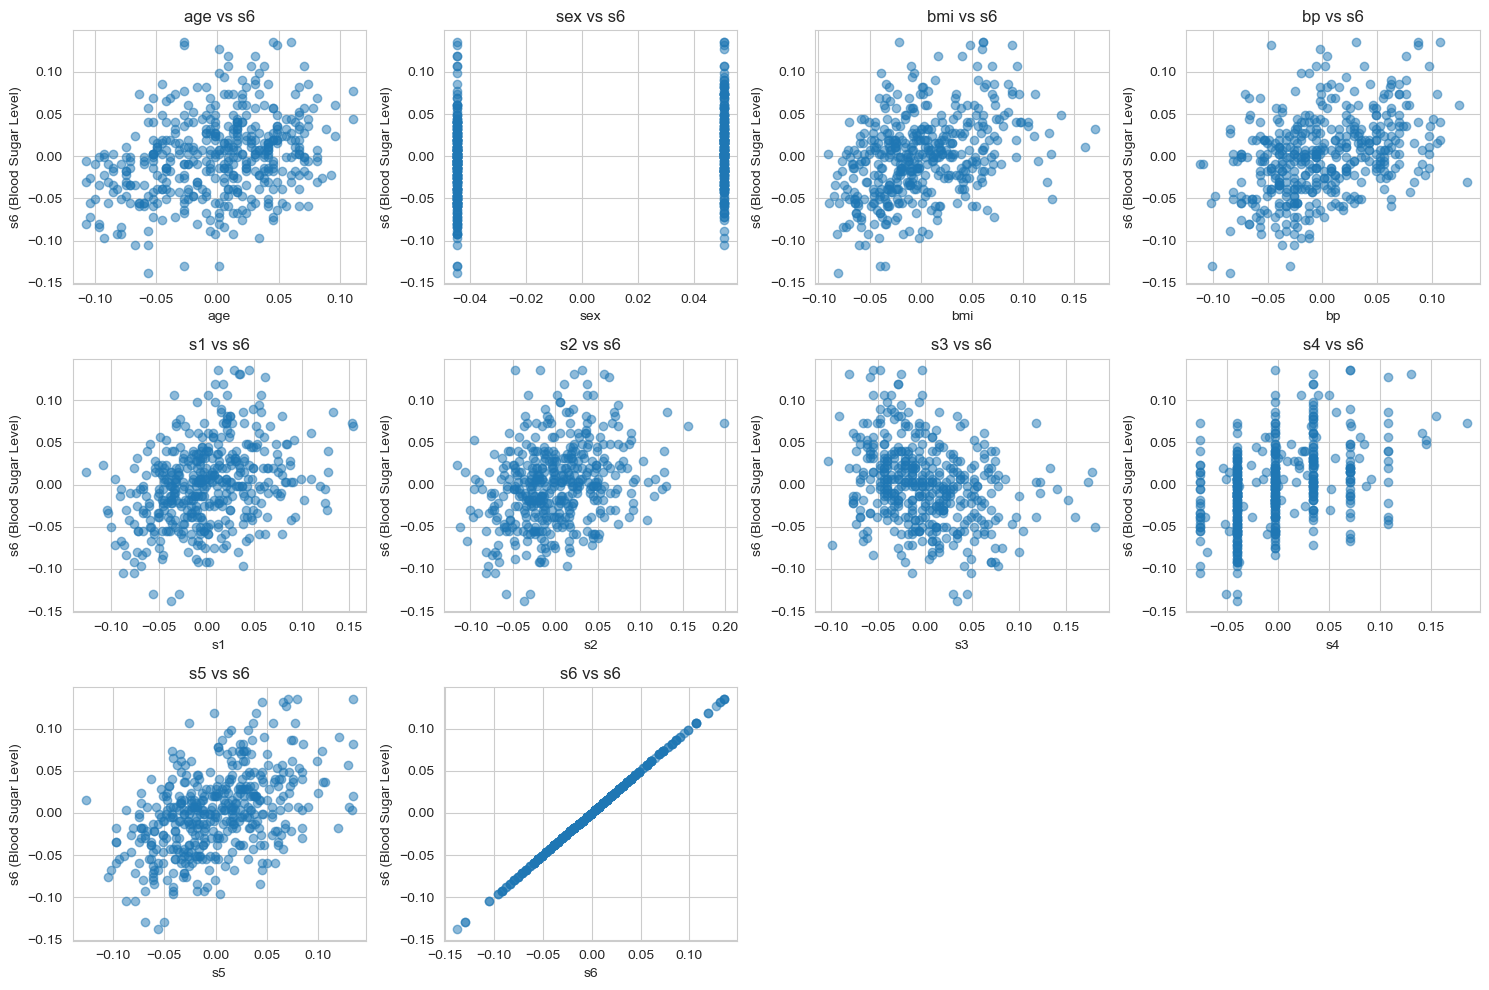

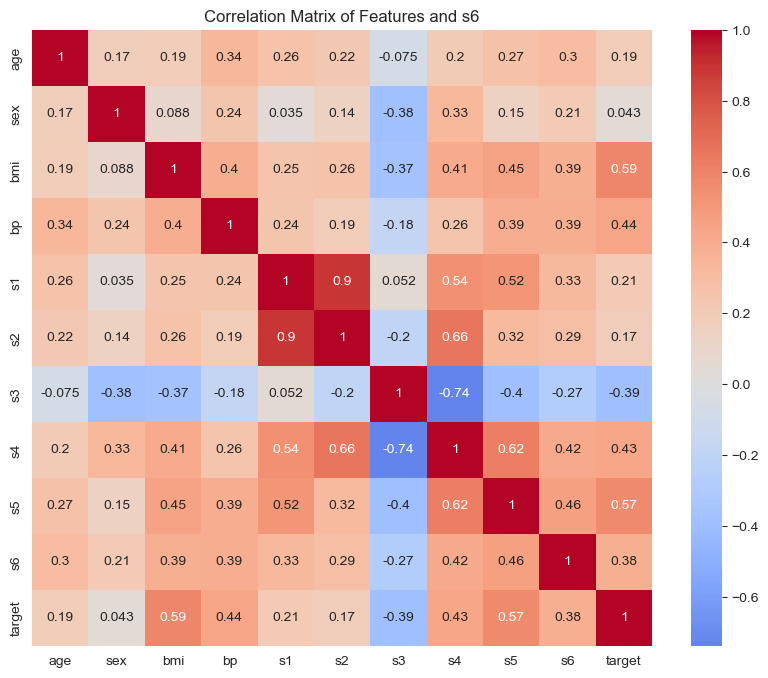

In [3]:
# Importing necessary libraries for visualization and data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better-looking plots
sns.set_style("whitegrid")

# Step: Correlation analysis
# Calculate and display correlations between 's6' (target) and all features
# Include the target itself for completeness
print("Correlation of Features with Target (s6, blood sugar level):")
correlation = df.corr()['s6'].sort_values(ascending=False)
print(correlation)

# Step: Scatter plots to visualize relationships between each feature and the target
# Create a subplot grid to display scatter plots for all features (excluding target)
plt.figure(figsize=(15, 10))  # Set figure size for clarity
for i, feature in enumerate(df.columns[:-1], 1):  # Exclude 'target' column, iterate over features
    plt.subplot(3, 4, i)  # Create subplot (3 rows, 4 columns)
    plt.scatter(df[feature], df['s6'], alpha=0.5)  # Scatter plot: feature vs s6
    plt.xlabel(feature)  # Label x-axis with feature name
    plt.ylabel('s6 (Blood Sugar Level)')  # Label y-axis
    plt.title(f'{feature} vs s6')  # Title for each subplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Optional: Visualize correlation matrix as a heatmap for better insight
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features and s6')
plt.show()

Build a Simple Linear Regression Model (Single Feature):

1. Choose a single feature (body mass index) as the predictor variable and the s6 glu, blood sugar level as the target variable.

2. Split the dataset into training and testing sets.

3. Train a simple linear regression model using the training data.

4. Evaluate the model's accuracy using metrics such as mean squared error (MSE) or R-squared on both the training and testing sets.

5. Visualize the actual vs. predicted values of the target variable on the testing set.

Training MSE: 0.0020
Training R-squared: 0.1640
Testing MSE: 0.0018
Testing R-squared: 0.0497


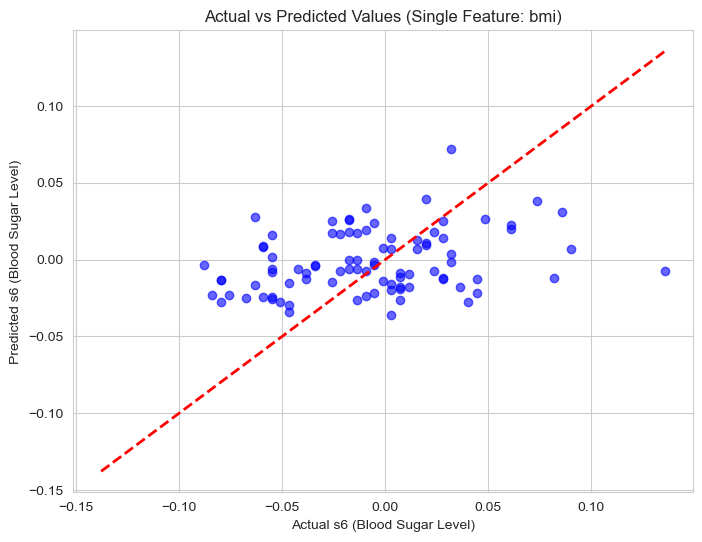

In [4]:
# Importing necessary libraries for modeling, evaluation, and visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into df (from previous steps)
# If not, add: from sklearn.datasets import load_diabetes; diabetes = load_diabetes(as_frame=True); df = diabetes.frame

# Step 1: Choosing single feature (bmi) as predictor and s6 as target
X = df[['bmi']]  # Predictor: body mass index
y = df['s6']     # Target: s6 glu, blood sugar level

# Step 2: Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Training a simple linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluating the model's accuracy on training and testing sets
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing evaluation results
print(f"Training MSE: {train_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")

# Step 5: Visualize actual vs. predicted values on the testing set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')  # Actual vs Predicted points
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Ideal line (y = x)
plt.xlabel('Actual s6 (Blood Sugar Level)')
plt.ylabel('Predicted s6 (Blood Sugar Level)')
plt.title('Actual vs Predicted Values (Single Feature: bmi)')
plt.grid(True)
plt.show()

Build a Simple Linear Regression Model (Two Features):

1.Select two features (body mass index and age in years) as predictor variables and the s6 glu, blood sugar level as the target variable.

2.Split the dataset into training and testing sets.
Train a simple linear regression model using the training data.

3.Assess the model's accuracy using metrics such as MSE or R-squared on both the training and testing sets.

4.Visualize the actual vs. predicted values of the target variable on the testing set.

Training MSE: 0.0018
Training R-squared: 0.2083
Testing MSE: 0.0016
Testing R-squared: 0.1564


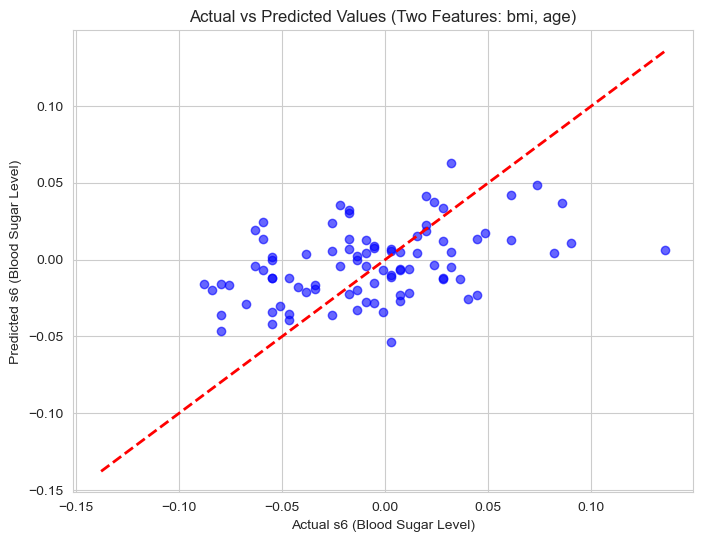

In [5]:
# Importing necessary libraries for modeling, evaluation, and visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into df (from previous steps)
# If not, add: from sklearn.datasets import load_diabetes; diabetes = load_diabetes(as_frame=True); df = diabetes.frame

# Step 1: Select two features (bmi and age) as predictors and s6 as target
X = df[['bmi', 'age']]  # Predictors: body mass index and age in years
y = df['s6']            # Target: s6 glu, blood sugar level

# Step 2: Spliting the dataset into training and testing sets (80/20 split)
# Train a simple linear regression model using the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Assessing the model's accuracy on training and testing sets using MSE and R-squared
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing evaluation results
print(f"Training MSE: {train_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")

# Step 4: Visualize actual vs. predicted values on the testing set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')  # Actual vs Predicted points
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Ideal line (y = x)
plt.xlabel('Actual s6 (Blood Sugar Level)')
plt.ylabel('Predicted s6 (Blood Sugar Level)')
plt.title('Actual vs Predicted Values (Two Features: bmi, age)')
plt.grid(True)
plt.show()